# Regression and Other Stories: Simple regression

In [17]:
import arviz as az
from bambi import Model, Prior
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


### Fitting a regression using a data frame in python

#### Simulate fake data

In [3]:
# R is one indexed
x = np.arange(1, 21)
n = x.shape
a = .2
b = .3
sigma = .5
y = a + b*x + sigma*stats.norm().rvs(n)

In [4]:
fake = pd.DataFrame({"x":x, "y":y})

#### Linear regression model

In [5]:
model = Model(fake)
results = model.fit('y ~ x', samples=1000, chains=4)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [y_sd, x, Intercept]
INFO:pymc3:NUTS: [y_sd, x, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
/opt/conda/lib/python3.8/site-packages/arviz/data/io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [6]:
func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(results, stat_funcs=func_dict, extend=False, round_to=2)
coefs

,Median,MAD_SD
Intercept[0],-0.07,0.14
x[0],0.32,0.01
y_sd,0.42,0.05


#### Plot for book

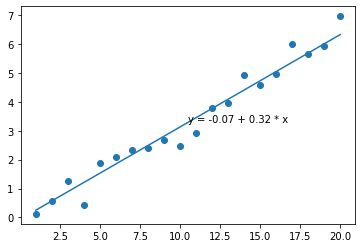

In [7]:
a_hat = coefs.loc["Intercept[0]", "Median"]
b_hat = coefs.loc["x[0]", "Median"]

fig, ax = plt.subplots()
ax.plot(x, a_hat+b_hat*x)
ax.scatter(x, y)

x_bar = x.mean()
ax.text(x_bar, a_hat+b_hat*x_bar,
       f"y = {np.round(a_hat, 2)} + {np.round(b_hat, 2)} * x");

### Formulating comparisons as regression models

#### SImulate fake data

In [8]:
n_0 = 20
y_0 = stats.norm(2, 5).rvs(n_0)
fake_0 = pd.DataFrame(dict(y_0=y_0))
print(y_0)

[ 5.33086482  9.92962251 -1.49500754  5.71785294 13.44597732  4.43200091
  2.91014636 -0.08174572 -2.18724767  3.31965208  7.6572797   6.83413099
 -3.90905037 -1.75517886 -0.49564915 -7.1368634  -1.38416885 13.48224316
 -1.34935036 -5.85603834]


In [9]:
np.round(y_0.mean(), 2)

2.37

In [14]:
np.round(y_0.std() /np.sqrt(n_0),2)

1.29

#### Estimating the mean is the same as regressing on a constant term

In [18]:
model.reset()
model = Model(fake_0)

# We set a very large prior to  act as a flat prior

uniform_prior = Prior('Uniform', lower=-10000, upper=10000)
priors = {"y_0_sd":uniform_prior, "Intercept":uniform_prior}

results = model.fit('y_0 ~ 1', samples=4000, chains=4, priors=priors)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [y_0_sd, Intercept]
INFO:pymc3:NUTS: [y_0_sd, Intercept]


Sampling 4 chains for 1_000 tune and 4_000 draw iterations (4_000 + 16_000 draws total) took 14 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 4_000 draw iterations (4_000 + 16_000 draws total) took 14 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8793396642679795, but should be close to 0.8. Try to increase the number of tuning steps.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
There were 39 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 39 divergences after tuning. Increase `target_accept` or reparameterize.
There were 122 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc

In [19]:
func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(results, stat_funcs=func_dict, extend=False)
coefs

,Median,MAD_SD
Intercept[0],2.349,0.825
y_0_sd,5.391,0.303


#### Estimating a difference is the same as regressing on an indicator variable

In [ ]:
# TODO

### Plot for the book

In [ ]:
# TODO